In [1]:
# Criar poetry folder
# Sacar dados online
# fazer first notebook para analisar os dados
# eda
# feature engineering
# non-model solution
# model solution
# deploy streamlit

# *Imports and Opening Datasets*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
animes_path = '../data/AnimeList.csv'
users_path = '../data/UserList.csv'
reviews_path = '../data/UserAnimeList.parquet'

In [4]:
animes_df = pd.read_csv(animes_path)
users_df = pd.read_csv(users_path)
reviews_df = pd.read_parquet(reviews_path, columns=['username', 'anime_id', 'my_score'])

# Animes_df Data Exploration and Preparation

In [5]:
animes_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [6]:
# List of Columns in animes_df
animes_df.columns.to_list()

['anime_id',
 'title',
 'title_english',
 'title_japanese',
 'title_synonyms',
 'image_url',
 'type',
 'source',
 'episodes',
 'status',
 'airing',
 'aired_string',
 'aired',
 'duration',
 'rating',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'favorites',
 'background',
 'premiered',
 'broadcast',
 'related',
 'producer',
 'licensor',
 'studio',
 'genre',
 'opening_theme',
 'ending_theme']

In [7]:
# seeing if Aired column has Strings
animes_df.aired[0]

"{'from': '2012-01-13', 'to': '2012-03-30'}"

In [8]:
## How Many animes are in the datatable
print(f'The dataset is composed of {animes_df.anime_id.count()} different anime series.')

The dataset is composed of 14478 different anime series.


In [9]:
# we only want Anime Series, not movies or OVAs
animes_df.type.unique()

array(['TV', 'Movie', 'Music', 'OVA', 'ONA', 'Special', 'Unknown'],
      dtype=object)

In [10]:
def bar_episodes_graph(dataframe):
  plt.title('Number of Animes per number of episodes')
  plt.xlabel('Number of Episodes')
  plt.ylabel('Number of Animes')
  return dataframe.episodes.value_counts().head(15).plot.bar(figsize=(10,7));

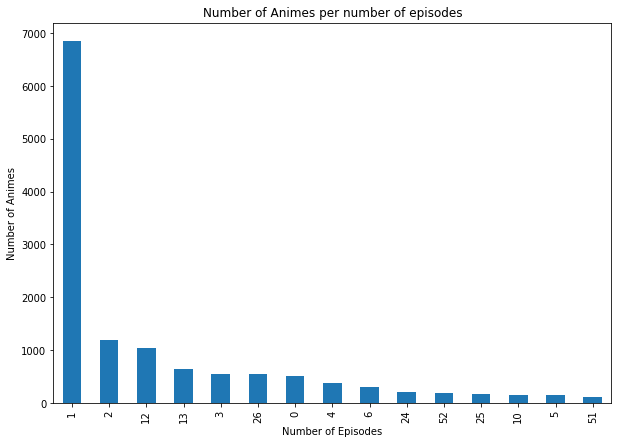

In [11]:
bar_episodes_graph(animes_df);

In [12]:
animes_df = animes_df[animes_df.type=='TV']

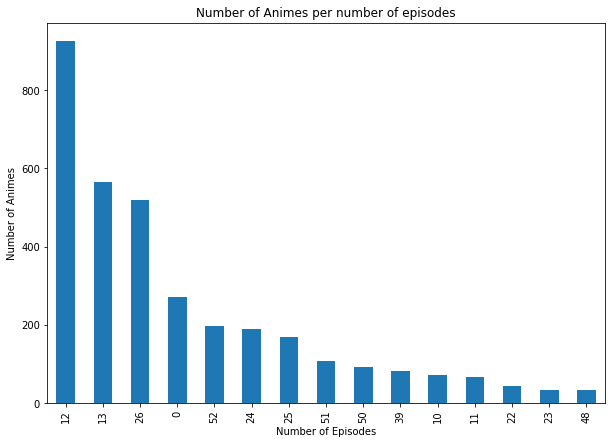

In [13]:
bar_episodes_graph(animes_df);

In [14]:
# includes the ones that still haven't aired and the ones airing
animes_df[animes_df.episodes==0]

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
31,966,Crayon Shin-chan,Shin Chan,クレヨンしんちゃん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,The first English dubbed version was produced ...,Spring 1992,Fridays at 19:30 (JST),"{'Adaptation': [{'mal_id': 2435, 'type': 'mang...",TV Asahi,Funimation,Shin-Ei Animation,"Slice of Life, Comedy, Ecchi, School, Seinen","['#01: ""Doubutsuen wa Taihen da"" by Tune&#039;...","['#01: ""Uta wo Utaou"" by Daiji-Man Brothers Ba..."
34,21,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
67,33398,Neko Konogoro,NaN,ネコこのゴロ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,NaN,Summer 2016,Not scheduled once per week,[],NaN,NaN,Kachidoki Studio,Comedy,[],[]
145,37435,Carol & Tuesday,NaN,キャロル&チューズデイ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Spring 2019,Unknown,[],flying DOG,NaN,Bones,"Drama, Music, Romance",[],[]
334,35503,Shoujo☆Kageki Revue Starlight,NaN,少女☆歌劇 レヴュー・スタァライト,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Summer 2018,Fridays at 01:28 (JST),[],Bushiroad,NaN,Kinema Citrus,"Music, School","['""Hoshi no Dialogue (星のダイアローグ)"" by Starlight ...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14383,30121,Fushigina Ano Ko wa Sutekina Kono Ko,NaN,ふしぎなあのこはすてきなこのこ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,0,Finished Airing,...,NaN,Spring 1994,Unknown,[],NHK,NaN,NaN,"Kids, Adventure",[],[]
14387,37630,Washimo 6th Season,NaN,わしも-wasimo-(第6シリーズ),Wasimo 6,https://myanimelist.cdn-dena.com/images/anime/...,TV,Picture book,0,Currently Airing,...,NaN,Spring 2018,Unknown,"{'Prequel': [{'mal_id': 35295, 'type': 'anime'...",NaN,NaN,NaN,"Sci-Fi, Slice of Life, Comedy, Kids, School",[],[]
14414,37662,Shinya! Tensai Bakabon,NaN,深夜! 天才バカボン,Late Night! Genius Bakabon,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Not yet aired,...,NaN,Summer 2018,Unknown,"{'Other': [{'mal_id': 11268, 'type': 'anime', ...",NaN,NaN,NaN,"Slice of Life, Comedy","['""BAKA-BONSOIR!"" by B.P.O -Bakabon-no Papa Or...",[]
14442,37428,Chara to Otamajakushi Shima,NaN,キャラとおたまじゃくし島,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Currently Airing,...,NaN,Spring 2018,Mondays at 10:15 (JST),[],"Dentsu, NHK",NaN,33 Collective,"Adventure, Fantasy, Kids",[],[]


In [15]:
animes_df.status.unique()

array(['Finished Airing', 'Currently Airing', 'Not yet aired'],
      dtype=object)

In [16]:
# we only want animes that Finished Airing or are currently airing for our suggestions
animes_df = animes_df[animes_df.status != 'Not yet aired']
animes_df.status.unique()

array(['Finished Airing', 'Currently Airing'], dtype=object)

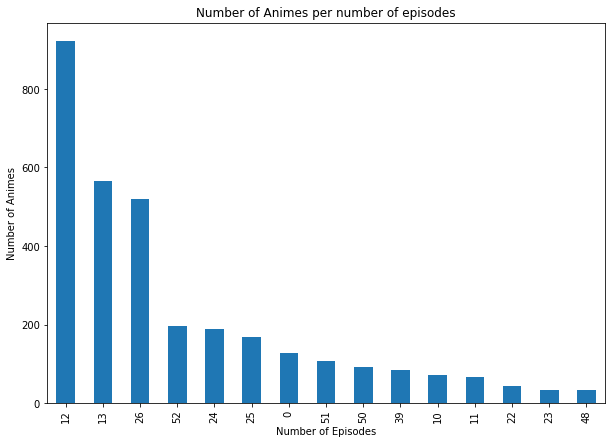

In [17]:
bar_episodes_graph(animes_df);

In [18]:
# get all the categories 
categories_list = [element for element in animes_df.genre.unique().tolist() if ',' not in str(element) and element == element]


categories_list

['Comedy',
 'Sci-Fi',
 'Slice of Life',
 'Game',
 'Ecchi',
 'Kids',
 'Sports',
 'Action',
 'Music',
 'Fantasy',
 'Adventure',
 'Horror',
 'Historical',
 'Magic',
 'Mystery',
 'School',
 'Drama',
 'Mecha',
 'Supernatural']

In [19]:
category_dic = {}
for category in categories_list:
  category_dic[category] = int(animes_df.genre.str.count(category).sum())
categories_df = pd.DataFrame(category_dic.items(), columns = ['category', 'count'])
categories_df

,category,count
0,Comedy,2029
1,Sci-Fi,828
2,Slice of Life,663
3,Game,144
4,Ecchi,273
5,Kids,578
6,Sports,259
7,Action,1187
8,Music,140
9,Fantasy,838


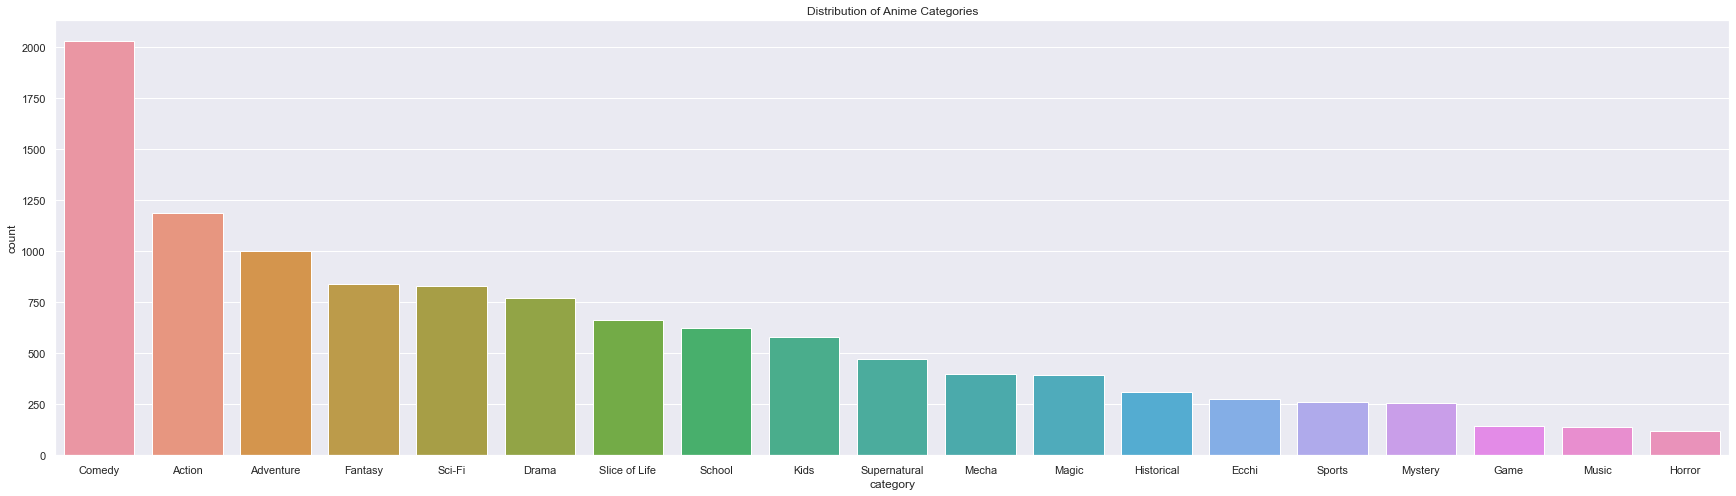

In [21]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(30,8))
plt.title('Distribution of Anime Categories')
ax = sns.barplot(x="category", y="count", data=categories_df.sort_values(by="count", ascending=False))

# One Hot Encode Genres

In [21]:
categories_list

['Comedy',
 'Sci-Fi',
 'Slice of Life',
 'Game',
 'Ecchi',
 'Kids',
 'Sports',
 'Action',
 'Music',
 'Fantasy',
 'Adventure',
 'Horror',
 'Historical',
 'Magic',
 'Mystery',
 'School',
 'Drama',
 'Mecha',
 'Supernatural']

In [22]:
genre_one_hot_encoded_df = animes_df.genre.str.get_dummies(', ')

genres_list = genre_one_hot_encoded_df.columns.tolist()
genre_one_hot_encoded_df.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
animes_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [24]:
animes_df = animes_df.join(genre_one_hot_encoded_df)
animes_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
columns_to_merge_to_ratings = ['anime_id', 'title', 'members', 'score'] + genres_list
columns_to_merge_to_ratings

['anime_id',
 'title',
 'members',
 'score',
 'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire']

# Stopping One Hot enconding Genres

In [22]:
print(f'The dataset is composed of {animes_df.anime_id.count()} different anime series after the data cleaning and preparation.')

The dataset is composed of 4121 different anime series after the data cleaning and preparation.


In [23]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4121 entries, 0 to 14473
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        4121 non-null   int64  
 1   title           4121 non-null   object 
 2   title_english   2422 non-null   object 
 3   title_japanese  4117 non-null   object 
 4   title_synonyms  2688 non-null   object 
 5   image_url       4117 non-null   object 
 6   type            4121 non-null   object 
 7   source          4121 non-null   object 
 8   episodes        4121 non-null   int64  
 9   status          4121 non-null   object 
 10  airing          4121 non-null   bool   
 11  aired_string    4121 non-null   object 
 12  aired           4121 non-null   object 
 13  duration        4121 non-null   object 
 14  rating          4121 non-null   object 
 15  score           4121 non-null   float64
 16  scored_by       4121 non-null   int64  
 17  rank            4121 non-null   

In [27]:
animes_ratings_df = animes_df[['anime_id', 'title', 'members', 'score']].sort_values(by=['score', 'members'], ascending=False).drop_duplicates('anime_id')

animes_ratings_df.head(10)

,anime_id,title,members,score
2555,5114,Fullmetal Alchemist: Brotherhood,1199091,9.25
6177,30484,Steins;Gate 0,223989,9.15
1252,28977,Gintama°,198744,9.15
2999,9253,Steins;Gate,1010330,9.14
418,11061,Hunter x Hunter (2011),720920,9.11
8992,9969,Gintama&#039;,215527,9.11
1307,35180,3-gatsu no Lion 2nd Season,85744,9.10
5783,15417,Gintama&#039;: Enchousen,123572,9.07
6615,35247,Owarimonogatari 2nd Season,113928,9.02
10879,34096,Gintama.,91695,9.02


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


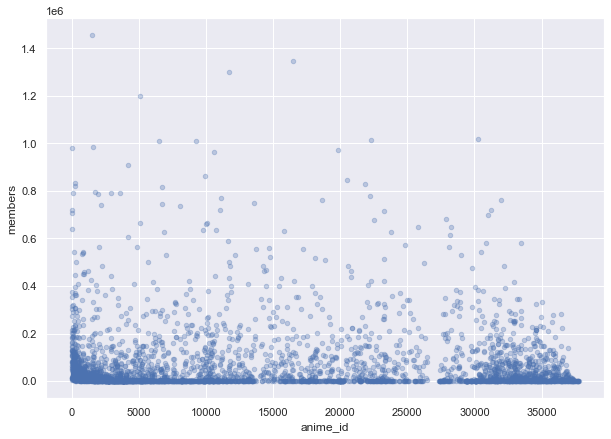

In [28]:
animes_ratings_df.plot.scatter(x='anime_id', y='members', alpha = 0.3, figsize=(10,7));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


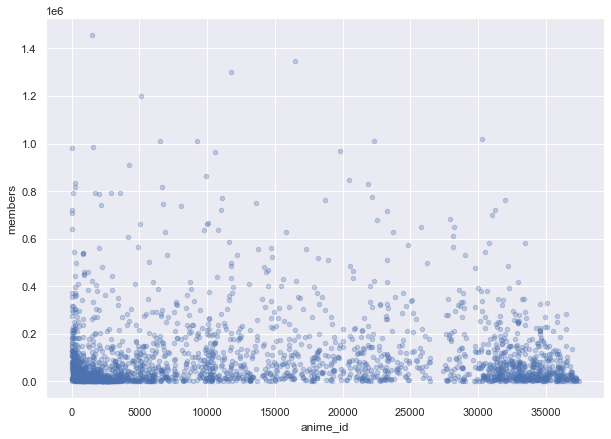

In [29]:
animes_ratings_df[animes_ratings_df['members']>2000].plot.scatter(x='anime_id', y='members', alpha = 0.3, figsize=(10,7));

# Users_df Data Exploration and Preparation

In [30]:
users_df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0


In [31]:
users_df.gender.value_counts()

Male          135181
Female         81374
Non-Binary      1245
Name: gender, dtype: int64

In [32]:
print(f'Mean Days Spent Watching Anime:', users_df.user_days_spent_watching.mean())
print(f'Median Days Spent Watching Anime:', users_df.user_days_spent_watching.median())

Mean Days Spent Watching Anime: 69.07645104485009
Median Days Spent Watching Anime: 39.58


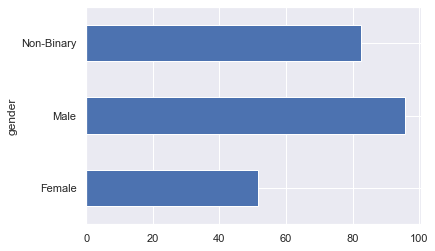

In [33]:
users_df.groupby('gender').user_days_spent_watching.mean().plot.barh();

In [34]:
users_df.groupby('gender').stats_mean_score.mean()

gender
Female        7.439718
Male          7.448905
Non-Binary    7.221133
Name: stats_mean_score, dtype: float64

# Reviews_df Exploration & Preparation

In [35]:
reviews_df = reviews_df.head(10000000)
reviews_df.head()

,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7


In [36]:
all_df = pd.merge(reviews_df, animes_df[['anime_id', 'title']], how='left', on='anime_id')
all_df.head()

,username,anime_id,my_score,title
0,karthiga,21,9,One Piece
1,karthiga,59,7,Chobits
2,karthiga,74,7,Gakuen Alice
3,karthiga,120,7,Fruits Basket
4,karthiga,178,7,Ultra Maniac


In [37]:
#all_df[all_df.title.value_counts()>10]
count_series = all_df['title'].value_counts()

all_df = all_df[all_df.title.isin(count_series[count_series > 2000].index)]
all_df.head()

,username,anime_id,my_score,title
0,karthiga,21,9,One Piece
1,karthiga,59,7,Chobits
2,karthiga,74,7,Gakuen Alice
3,karthiga,120,7,Fruits Basket
5,karthiga,210,7,Ranma ½


In [38]:
reviews_df.drop_duplicates(subset=['username', 'anime_id'], keep='last', inplace=True)
all_df.drop_duplicates(subset=['username', 'anime_id'], keep='last', inplace=True)

score_matrix_df = all_df.pivot_table(index='username', columns='title', values='my_score')


In [39]:
score_matrix_df.head()

title,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,3-gatsu no Lion,91 Days,A-Channel,ACCA: 13-ku Kansatsu-ka,Aa! Megami-sama! (TV),...,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
username,,,,,,,,,,,,,,,,,,,,,
--Andrea--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--Etsuko--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
--FallenAngel--,NaN,7.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,9.0,NaN,9.0,NaN,7.0,10.0,9.0,NaN,9.0,9.0
--Kusanagi--,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--Rica-chan--x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
all_df.title.value_counts()

Death Note                                  22604
Code Geass: Hangyaku no Lelouch             19619
Toradora!                                   17821
Elfen Lied                                  17802
Fullmetal Alchemist: Brotherhood            17673
                                            ...  
Chu-Bra!!                                    2021
Sidonia no Kishi: Daikyuu Wakusei Seneki     2018
Shuffle! Memories                            2016
Comet Lucifer                                2012
Ousama Game The Animation                    2005
Name: title, Length: 1073, dtype: int64

In [42]:
score_matrix_df.to_parquet('../data/score_matrix.parquet')

# Reccomendations based on users that saw the same anime

## People also liked... (NO MACHINE LEARNING)

In [41]:
def recommendation_system(anime_name):
  # grab user ratings for the a certain anime
  anime_user_ratings = score_matrix_df[anime_name]

  # Use Corrwith as a method to get user correlation
  similar_to_anime = score_matrix_df.corrwith(anime_user_ratings)

  # Clean the null values from both movies
  corr_anime = pd.DataFrame(similar_to_anime, columns=['Correlation'])

  #corr_anime.dropna(inplace=True)
  return corr_anime.sort_values('Correlation',ascending=False).head(10)

In [43]:
recommendation_system('Bleach')

,Correlation
title,
Bleach,1.000000
Naruto: Shippuuden,0.508427
Naruto,0.472973
One Piece,0.413257
Fairy Tail,0.403042
InuYasha,0.383167
Dragon Ball,0.379646
Katekyo Hitman Reborn!,0.379056
Bakuten Shoot Beyblade,0.378186


In [44]:
recommendation_system('Dragon Ball')

,Correlation
title,
Dragon Ball,1.000000
Dragon Ball Z,0.735790
Dragon Ball GT,0.663618
Digimon Adventure,0.535312
Yu☆Gi☆Oh!,0.528324
Digimon Adventure 02,0.518616
Bishoujo Senshi Sailor Moon SuperS,0.515235
Yu☆Gi☆Oh! Duel Monsters,0.508067
Bishoujo Senshi Sailor Moon S,0.499373


In [45]:
recommendation_system('One Outs')

,Correlation
title,
One Outs,1.000000
Touhai Densetsu Akagi: Yami ni Maiorita Tensai,0.496521
Hajime no Ippo: New Challenger,0.495025
Major S1,0.491287
Hajime no Ippo,0.469305
Gyakkyou Burai Kaiji: Ultimate Survivor,0.453824
Kamen no Maid Guy,0.452746
Cross Game,0.444791
Giant Killing,0.441235


# WORD2VEC - START

In [46]:
all_df.head()

,username,anime_id,my_score,title
0,karthiga,21,9,One Piece
1,karthiga,59,7,Chobits
2,karthiga,74,7,Gakuen Alice
3,karthiga,120,7,Fruits Basket
5,karthiga,210,7,Ranma ½


In [47]:
# only positive ratings (positive ratings are 7=<)
positive_ratings_df = all_df[all_df.my_score>=7]

positive_ratings_df

,username,anime_id,my_score,title
0,karthiga,21,9,One Piece
1,karthiga,59,7,Chobits
2,karthiga,74,7,Gakuen Alice
3,karthiga,120,7,Fruits Basket
5,karthiga,210,7,Ranma ½
...,...,...,...,...
9999872,pcmil,16742,10,Watashi ga Motenai no wa Dou Kangaetemo Omaera...
9999885,pcmil,17895,10,Golden Time
9999889,pcmil,18179,10,Yowamushi Pedal
9999908,pcmil,19815,10,No Game No Life


In [48]:
anime_user_lists = positive_ratings_df.groupby('username')['title'].apply(list).to_list()
anime_user_lists[0]

['Naruto',
 'Kannazuki no Miko',
 'Maria-sama ga Miteru',
 'Noir',
 'Strawberry Panic',
 'Zero no Tsukaima',
 'Zero no Tsukaima: Futatsuki no Kishi',
 'El Cazador de la Bruja',
 'True Tears',
 'Myself; Yourself',
 'Vampire Knight',
 'Zero no Tsukaima: Princesses no Rondo',
 'Michiko to Hatchin',
 'Ga-Rei: Zero',
 'Vampire Knight: Guilty',
 'Phantom: Requiem for the Phantom',
 'Sasameki Koto']

In [49]:
from gensim.test.utils import common_texts
from gensim.models.word2vec import Word2Vec

model = Word2Vec(anime_user_lists, window=100, min_count=1, workers=4)

In [50]:
model.wv.most_similar('Naruto')

[('Detective Conan', 0.5548937916755676),
 ('Shuffle!', 0.445701539516449),
 ('Shaman King', 0.40800994634628296),
 ('Yu☆Gi☆Oh!: Duel Monsters GX', 0.3955540060997009),
 ('Yu☆Gi☆Oh!', 0.38859793543815613),
 ('Blood+', 0.37829387187957764),
 ('Chobits', 0.36145973205566406),
 ('Pokemon Diamond & Pearl', 0.3609588146209717),
 ('Black Cat', 0.34527698159217834),
 ('Rurouni Kenshin: Meiji Kenkaku Romantan', 0.34281790256500244)]

In [51]:
model.wv.most_similar('Bleach')

[('Shijou Saikyou no Deshi Kenichi', 0.3951044976711273),
 ('Shaman King', 0.30937451124191284),
 ('Kaze no Stigma', 0.28932151198387146),
 ('Romeo x Juliet', 0.2865801453590393),
 ('Black Blood Brothers', 0.2686856687068939),
 ('Nabari no Ou', 0.2646389603614807),
 ('Devil May Cry', 0.26306161284446716),
 ('Hanbun no Tsuki ga Noboru Sora', 0.25528645515441895),
 ('Kimi ga Aruji de Shitsuji ga Ore de', 0.2546112835407257),
 ('Air Gear', 0.24139514565467834)]

In [52]:
model.wv.most_similar('One Piece')

[('Yu☆Gi☆Oh!', 0.4802980422973633),
 ('Slam Dunk', 0.47817814350128174),
 ('Rurouni Kenshin: Meiji Kenkaku Romantan', 0.46838536858558655),
 ('Shuffle!', 0.46685752272605896),
 ('Shaman King', 0.46212559938430786),
 ('Yu☆Gi☆Oh!: Duel Monsters GX', 0.4487612545490265),
 ('Beck', 0.4430881142616272),
 ('Bakuten Shoot Beyblade', 0.43459004163742065),
 ('Dragon Ball GT', 0.4269469976425171),
 ('Hunter x Hunter', 0.40162259340286255)]

In [53]:
model.wv.most_similar('Hunter x Hunter')

[('Shaman King', 0.6035513281822205),
 ('Slam Dunk', 0.5335123538970947),
 ('Black Cat', 0.5125495195388794),
 ('Detective Conan', 0.5108388662338257),
 ('Tennis no Ouji-sama', 0.4947377145290375),
 ('Hikaru no Go', 0.49280187487602234),
 ('Konjiki no Gash Bell!!', 0.4923083186149597),
 ('Ueki no Housoku', 0.4916142523288727),
 ('Rurouni Kenshin: Meiji Kenkaku Romantan', 0.4808925688266754),
 ('Yu☆Gi☆Oh!: Duel Monsters GX', 0.4573303461074829)]

In [54]:
model.wv.most_similar('One Outs')

[('Hajime no Ippo: New Challenger', 0.611661434173584),
 ('Rainbow: Nisha Rokubou no Shichinin', 0.6099920272827148),
 ('Major S1', 0.5872371792793274),
 ('Cross Game', 0.5708805322647095),
 ('Gyakkyou Burai Kaiji: Ultimate Survivor', 0.5561374425888062),
 ('Giant Killing', 0.5545886754989624),
 ('Hajime no Ippo', 0.5378661751747131),
 ('Hajime no Ippo: Rising', 0.5003686547279358),
 ('Kurozuka', 0.47541505098342896),
 ('Slam Dunk', 0.4750217795372009)]

In [55]:
model.wv.most_similar('Cowboy Bebop')

[('Monster', 0.5353963375091553),
 ('Beck', 0.5167974233627319),
 ('Kenpuu Denki Berserk', 0.5105201005935669),
 ('Mousou Dairinin', 0.4947364330291748),
 ('Ima, Soko ni Iru Boku', 0.43721556663513184),
 ('Gankutsuou', 0.43255141377449036),
 ('Rurouni Kenshin: Meiji Kenkaku Romantan', 0.4288780391216278),
 ('Kino no Tabi: The Beautiful World', 0.4005466103553772),
 ('Gunslinger Girl', 0.3873476982116699),
 ('Shoujo Kakumei Utena', 0.38599416613578796)]